### Task 4
#### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [8]:
df_train= pd.read_csv(r'C:\Users\Yadhnesh\Dropbox\PC\Downloads\twitter_training.csv')

In [9]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
df_train.shape

(74681, 4)

In [11]:
df_train.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
df_train.dtypes

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

In [14]:
df_train.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [16]:
df_train.dropna(subset=['im getting on borderlands and i will murder you all ,'] , inplace=True)

In [17]:
df_train.shape

(73995, 4)

In [18]:
df_train.Positive.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [24]:
df_train.Positive=df_train.Positive.replace('Irrelevant' , 'Neutral')


In [25]:
df_train.Positive.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

### Exploratory Data Analysis

In [26]:
Positive_count=df_train.Positive.value_counts()
Positive_count

Positive
Neutral     30983
Negative    22358
Positive    20654
Name: count, dtype: int64

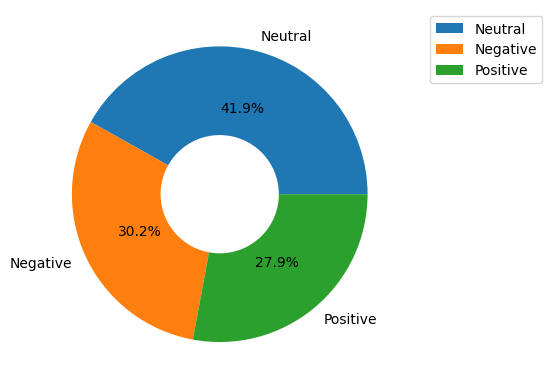

In [27]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(Positive_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
df_train.Borderlands.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [30]:
Entity_count=df_train.Borderlands.value_counts()
Entity_count

Borderlands
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Overwatch                            2316
Battlefield                          2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands           

In [31]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [32]:
Entity_top10=Entity_sort.head(10)
Entity_top10

Borderlands
LeagueOfLegends         2377
MaddenNFL               2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64

In [33]:
Entity_index=Entity_top10.index

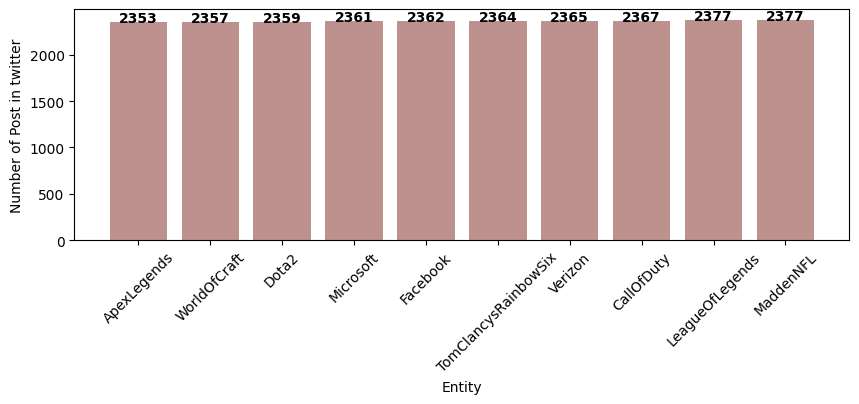

In [41]:
plt.figure(figsize=(10,3))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#A2625D')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

In [42]:
Entity_top3_df=Entity_sort.head(3)
Entity_top3_df

Borderlands
LeagueOfLegends    2377
MaddenNFL          2377
CallOfDuty         2376
Name: count, dtype: int64

In [43]:
Entity_top3=Entity_top3_df.index.tolist()
Entity_top3

['LeagueOfLegends', 'MaddenNFL', 'CallOfDuty']

In [44]:
sentiment_by_entity=df_train.loc[df_train['Borderlands'].isin(Entity_top3)].groupby('Borderlands')['Positive'].value_counts().sort_index()
sentiment_by_entity

Borderlands      Positive
CallOfDuty       Negative     883
                 Neutral     1047
                 Positive     446
LeagueOfLegends  Negative     632
                 Neutral     1130
                 Positive     615
MaddenNFL        Negative    1694
                 Neutral      287
                 Positive     396
Name: count, dtype: int64

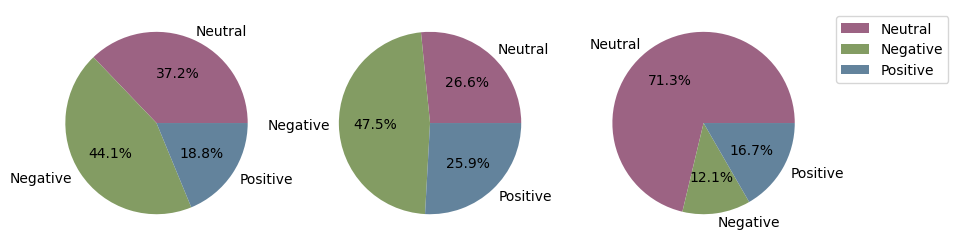

In [45]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#9C6383' , '#839C63' , '#63839C']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_entity[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")